In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\AJITESH\Desktop\Day-7\Student_performance_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [4]:
x = df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation','StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport','Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']]
y = df['GradeClass']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 50)

In [6]:
model = DecisionTreeClassifier()

In [7]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
yhat = model.predict(x_test)

In [9]:
cm = confusion_matrix(y_test, yhat)
print(cm)

[[ 21   1   1   1   7]
 [  1  57   4   7  13]
 [  4   1  93  10   6]
 [  4   3   6 100  12]
 [  8  10   4   8 336]]


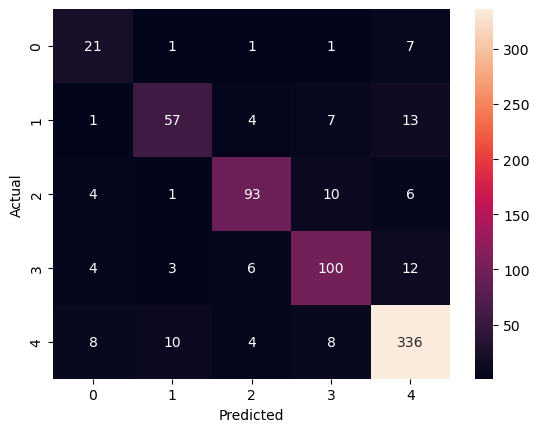

In [10]:
sns.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:
cr = classification_report(y_test,yhat)
print(cr)

              precision    recall  f1-score   support

         0.0       0.55      0.68      0.61        31
         1.0       0.79      0.70      0.74        82
         2.0       0.86      0.82      0.84       114
         3.0       0.79      0.80      0.80       125
         4.0       0.90      0.92      0.91       366

    accuracy                           0.85       718
   macro avg       0.78      0.78      0.78       718
weighted avg       0.85      0.85      0.85       718



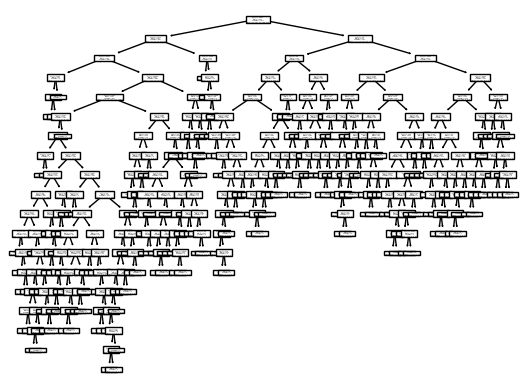

In [26]:
plot_tree(model)
plt.show()

In [36]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [46]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth' : [5,10,15, None],
             'max_leaf_nodes': [12,13,150,None]}

In [48]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |
 |  Exhaustive search over specified parameter values for an estimator.
 |
 |  Important members are fit, predict.
 |
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |
 |  Read more in the :ref:`User Guide <grid_search>`.
 |
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs

In [50]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = 1)

In [52]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'max_leaf_nodes': [12, 13, 150, None]},
             verbose=1)

In [54]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 12}

In [56]:
grid.best_score_

0.928906962195013

In [58]:
bestmodel = grid.best_estimator_

In [60]:
yhat = bestmodel.predict(x_test)

In [62]:
clf = classification_report(y_test, yhat)
print(clf)

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80        31
         1.0       0.94      0.77      0.85        82
         2.0       0.98      0.93      0.95       114
         3.0       0.90      0.90      0.90       125
         4.0       0.91      0.98      0.95       366

    accuracy                           0.92       718
   macro avg       0.93      0.86      0.89       718
weighted avg       0.92      0.92      0.92       718

